In [1]:
%matplotlib inline
from matplotlib import gridspec

from miran import *
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
sns.set_palette("Reds_d", 5); my_palette='Reds'; libcolor='Reds'
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

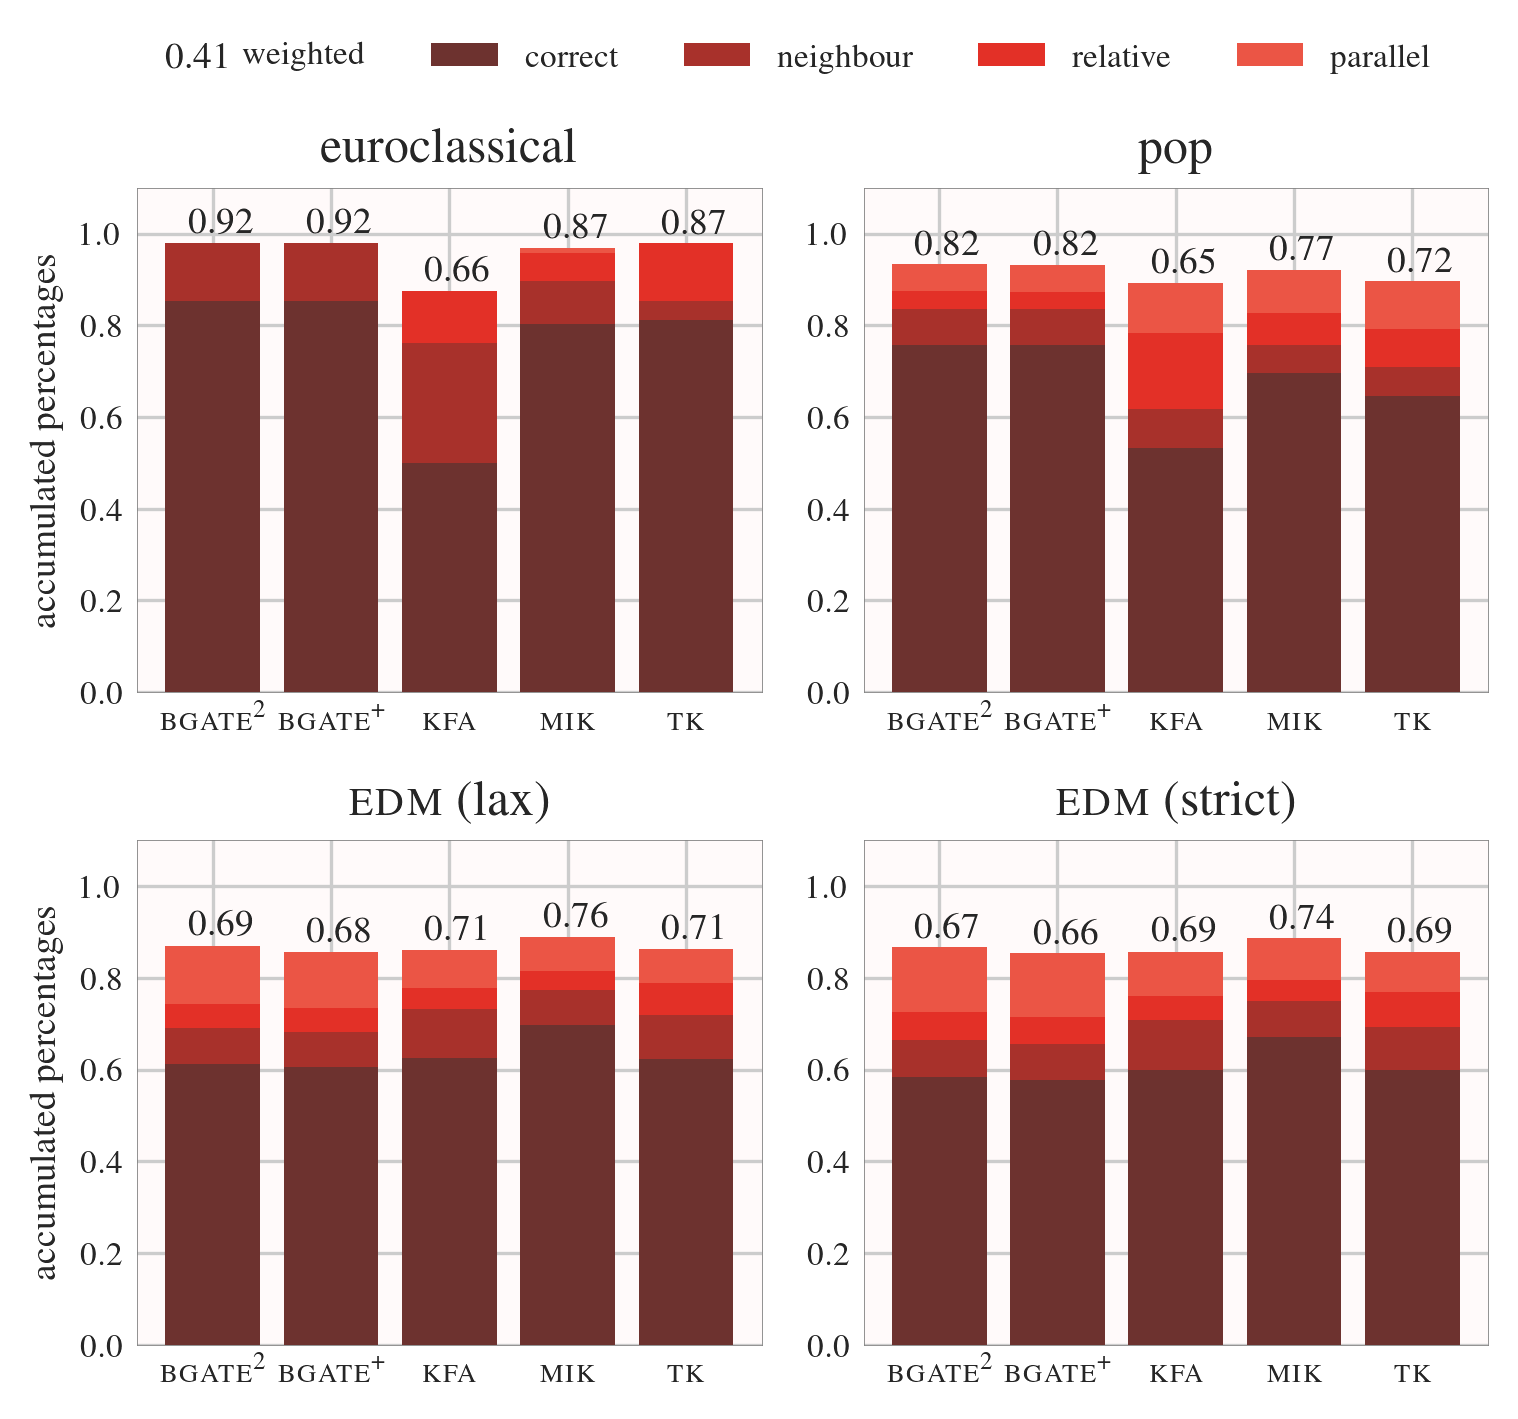

In [20]:
# COMPARISON 1

plt.figure(figsize=(5.16, 4.5), dpi=150)

a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE2-WTC.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE+-WTC.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-KFA-WTC.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-MIK-WTC.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-TK-WTC.xlsx'])
cor, nei, rel, par, wei = a

plt.subplot(2,2,1)
plt.title("euroclassical")
plt.ylim([0,1.1])
plt.ylabel('accumulated percentages')
plt.xticks(range(len(a[0])), (r'\textsc{bgate}\textsuperscript{2}', r'\textsc{bgate}\textsuperscript{+}', 
                              r'\textsc{kfa}',r'\textsc{mik}',r'\textsc{tk}'))

plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)
plt.text(-0.4, 1.36,  '0.41', fontsize=9)    
plt.text(0.25, 1.37,  'weighted', fontsize=8)
plt.legend(fontsize=8, frameon=False, loc=(0.45, 1.2), ncol=4)


plt.subplot(2,2,2)
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE2-POP.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE+-POP.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-KFA-POP.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-MIK-POP.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-TK-POP.xlsx'])

cor, nei, rel, par, wei = a
plt.title(r"pop")
plt.ylim([0,1.1])
plt.xticks(range(len(a[0])), (r'\textsc{bgate}\textsuperscript{2}', r'\textsc{bgate}\textsuperscript{+}', 
                              r'\textsc{kfa}',r'\textsc{mik}',r'\textsc{tk}'))
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.subplot(2,2,3)
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE2-EDM-LAX.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE+-EDM-LAX.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-KFA-EDM-LAX.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-MIK-EDM-LAX.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-TK-EDM-LAX.xlsx'])

cor, nei, rel, par, wei = a
plt.title(r"\textsc{edm} (lax)")
plt.ylabel('accumulated percentages')

plt.ylim([0,1.1])
plt.xticks(range(len(a[0])), (r'\textsc{bgate}\textsuperscript{2}', r'\textsc{bgate}\textsuperscript{+}', 
                              r'\textsc{kfa}',r'\textsc{mik}',r'\textsc{tk}'))
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

plt.subplot(2,2,4)
a = get_scores_from_xlsx(['/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE2-EDM-STRICT.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-BGATE+-EDM-STRICT.xlsx', 
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-KFA-EDM-STRICT.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-MIK-EDM-STRICT.xlsx',
                          '/Users/angel/Dropbox/Apps/Texpad/Thesis/evaluation/THESIS/FINAL-TK-EDM-STRICT.xlsx'])

cor, nei, rel, par, wei = a
plt.title(r"\textsc{edm} (strict)")
plt.ylim([0,1.1])
plt.xticks(range(len(a[0])), (r'\textsc{bgate}\textsuperscript{2}', r'\textsc{bgate}\textsuperscript{+}', 
                              r'\textsc{kfa}',r'\textsc{mik}',r'\textsc{tk}'))
plt.bar(range(len(a[0])), cor, label='correct', linewidth=.0, edgecolor=(0, .0, .0))
plt.bar(range(len(a[0])), nei, bottom=cor, label='neighbour', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), rel, bottom=np.add(cor,nei), label='relative', linewidth=0.0, edgecolor=(0, .0, .1))
plt.bar(range(len(a[0])), par, bottom=np.add(np.add(cor,nei),rel), label='parallel', linewidth=0.0, edgecolor=(0, .0, .1))
for i in range(len(wei)):
    plt.text(i-0.21, 0.02+cor[i]+nei[i]+rel[i]+par[i], '%.2f' % wei[i], fontsize=9)

    
plt.tight_layout()
plt.savefig('/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/comparison_final.pdf', format="pdf", dpi=1200, bbox_inches='tight')